<a href="https://colab.research.google.com/github/reyhanMaulana-dev/Data-Mining/blob/main/Capstone1/Capstone_Project_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 01: Kelompok E**

**Kelompok E**

| NIM | Nama |
| -------- | -------- |
|11220940000006   | Ahmad Izza	   |
|11220940000021   |     Nadira Afsarina Biya |
|11220940000030   | Adinda Nabila Fitri Heryanto |
|11220940000048 |      Reyhan Maulana Aryaduta |
|11220940000053  |     Uswatun Hasanah  |

# **Analisisa Tracer Study Fakultas Sains dan Teknologi (FST) UIN Jakarta**



## **Data Understanding**

Dataset ini berisi 435 entri dengan berbagai variabel yang merekam informasi tentang alumni UIN Jakarta. Berikut adalah penjelasan untuk masing-masing variabel yang tersedia:

1. **Timestamp**: Kolom ini menyimpan tanggal dan waktu ketika data alumni diisi.
2. **Tahun Masuk UIN Jakarta**: Tahun ketika alumni mulai kuliah di UIN Jakarta.
3. **Tahun Wisuda**: Tahun ketika alumni diwisuda.
4. **Bulan Wisuda**: Bulan ketika alumni diwisuda.
5. **No HP (WhatsApp)**: Nomor WhatsApp alumni.
6. **Email**: Alamat email alumni.
7. **Waktu Mendapatkan Pekerjaan**: Kapan alumni mendapatkan pekerjaan pertama kali setelah lulus.
8. **Status saat ini**: Status pekerjaan saat ini (misal: Karyawan Swasta, Wirausahawan, Pengajar).
9. **Tahun Wirausaha**: Tahun mulai wirausaha.
10. **Bidang Wirausaha**: Bidang usaha alumni yang memiliki usaha.i.
11. **Perusahaan**: Nama perusahaan tempat alumni bekerja.
12. **Posisi**: Posisi pekerjaan alumni di perusahaan.
13. **Penghasilan**: Penghasilan bulanan alumni.
14. **Universitas**: Nama universitas tempat alumni melanjutkan studi.
15. **Tahun Masuk Studi Lanjut**: Tahun ketika alumni memulai studi lanjut.
16. **Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta**: Nama program studi yang diambil alumni setelah kuliah di FST UIN Jakarta.
17. **Kesesuaian Kurikulum**: Tingkat kesesuaian kurikulum dengan bidang kerja alumni.
18. **Kesesuaian Bidang Ilmu**: Tingkat kesesuaian bidang ilmu dengan pekerjaan alumni.
19. **Saran**: Saran alumni mengenai program studi atau pengalaman di UIN Jakarta. Terdapat 204 entri yang terisi.
20. **Program Studi**: Nama program studi alumni ketika kuliah di UIN Jakarta.
21. **Lama Bekerja di Institusi Saat ini**: Tidak ada entri yang terisi di kolom ini (semua nilai adalah missing).
22. **Kota Tempat Bekerja Saat Ini**: Tidak ada entri yang terisi (semua nilai adalah missing).


# **IMPORT MODULE**

In [ ]:
# Importing Some Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle

from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


!pip install wordcloud matplotlib pandas
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.7 MB/s eta 0:00:00


# **LOAD DATASET**

In [ ]:
try :
  df = pd.read_csv('data/alumni.csv', index_col="Nomor Induk Mahasiswa (NIM)")
except :
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/reyhanMaulana-dev/Data-Mining/refs/heads/main/Capstone1/alumni.csv
  df = pd.read_csv('data/alumni.csv', index_col="Nomor Induk Mahasiswa (NIM)")

--2024-10-27 09:44:35--  https://raw.githubusercontent.com/reyhanMaulana-dev/Data-Mining/refs/heads/main/Capstone1/alumni.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105802 (103K) [text/plain]
Saving to: ‘data/alumni.csv’

alumni.csv          100%[===================>] 103.32K  --.-KB/s    in 0.02s   

2024-10-27 09:44:36 (5.14 MB/s) - ‘data/alumni.csv’ saved [105802/105802]



In [ ]:
df.head()

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,No HP (WhatsApp):,email,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,...,Penghasilan,Univeritas,Tahun Masuk Studi Lanjut:,Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Bekerja di Institusi Saat ini:,Kota tempat bekerja saat Ini
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,,,,
1,7/3/2024 8:09:53,2019,2023,Februari,85267511845,1@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,NaN,NaN
2,6/4/2024 11:27:37,2018,2024,Mei,85267511846,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
3,6/4/2024 11:28:30,2018,2024,Mei,85267511847,3@gmail.com,6-12 bulan,Karyawan Swasta,NaN,NaN,...,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1,NaN,NaN
4,6/4/2024 11:28:54,2017,2024,Mei,85267511848,1@gmail.com,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
5,6/4/2024 11:29:03,2019,2024,Mei,85267511849,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 1 to 435
Data columns (total 22 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Timestamp                                                       435 non-null    object 
 1   Tahun Masuk UIN Jakarta                                         435 non-null    object 
 2   Tahun Wisuda                                                    435 non-null    object 
 3   Bulan Wisuda                                                    435 non-null    object 
 4   No HP (WhatsApp):                                               435 non-null    int64  
 5   email                                                           435 non-null    object 
 6   Waktu Mendapatkan Pekerjaan:                                    435 non-null    object 
 7   Status saat ini:                                          

# **PREPROCCESING**

## **VARIABEL SELECTION**

In [ ]:
df.drop(['No HP (WhatsApp):', 'email', 'Lama Bekerja di Institusi Saat ini:', 'Kota tempat bekerja saat Ini'], axis=1, inplace=True)

- Kolom **'No HP (WhatsApp)', 'email', 'Timestamp'** dihapus karena tidak relevan untuk analisis lebih lanjut dan tidak dapat diolah secara bermakna.
- Kolom **'Lama Bekerja di Institusi Saat ini'** dan **'Kota tempat bekerja saat Ini'** dihapus karena seluruh data di dalamnya kosong, sehingga tidak memberikan kontribusi signifikan terhadap analisis.

In [ ]:
df.rename(columns={ "Status saat ini:" : "Status Saat Ini",
                    "Waktu Mendapatkan Pekerjaan:" : "Waktu Mendapatkan Pekerjaan",
                    "Bidang wirausaha:" : "Bidang Wirausaha",
                    "Univeritas" : "Universitas",
                    "Tahun Masuk Studi Lanjut:" : "Tahun Masuk Studi Lanjut",
                    "Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta: " : "Nama program studi setelah Kuliah di FST UIN Jakarta",
                    "Kesesuaian Kurikulum:" : "Kesesuaian Kurikulum",
                    "Kesesuaian Bidang Ilmu:" : "Kesesuaian Bidang Ilmu"
                   }, inplace=True)

Melakukan penyesuaian nama kolom pada dataset agar lebih seragam dan sesuai dengan standar penamaan yang baik

## **Mengubah Tipe Data**

In [ ]:
# Fungsi untuk mengubah tipe kolom
def convert_data_type(data_type, columns):
    for column in columns:
        df[column] = df[column].astype(data_type)

category_column = ['Program Studi', 'Bulan Wisuda', 'Kesesuaian Kurikulum', 'Kesesuaian Bidang Ilmu']
convert_data_type("category", category_column)

float_column = []

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

## **DUPLIKAT**

In [ ]:
print(df.shape)
df.duplicated().sum()

(435, 18)


0

Tidak terdapat duplikat pada data

## **NOISE**

In [ ]:
# Fungsi untuk memeriksa data
def chechk_values(column_name, set):
  data_filter = []
  for key in set:
    data_filter.append(df[df[column_name] == key])
  result = pd.concat(data_filter, ignore_index=False)
  return result.T

# Fungsi untuk memeriksa noise
def check_unique_values(columns):
    # columns = list(df.columns)
    for column in columns:
        print("\n", column)
        print(df[column].unique())

# Fungsi untuk merubah nilai noise
def replace_value(column_name, set):
    df[column_name].replace(set, inplace=True)

### New Section

In [ ]:
columns1 = list(df.columns[:4]) + ["Penghasilan"]
check_unique_values(columns1)


 Timestamp
<DatetimeArray>
['2024-07-03 08:09:53', '2024-06-04 11:27:37', '2024-06-04 11:28:30',
 '2024-06-04 11:28:54', '2024-06-04 11:29:03', '2024-06-04 11:30:08',
 '2024-06-04 11:30:53', '2024-06-04 11:34:16', '2024-06-04 12:04:35',
 '2024-06-04 12:07:40',
 ...
 '2024-08-28 12:47:59', '2024-08-28 14:16:03', '2024-08-28 14:34:01',
 '2024-09-06 08:22:48', '2024-09-08 21:40:47', '2024-09-11 13:28:49',
 '2024-09-18 15:07:09', '2024-10-14 14:49:49', '2024-10-15 14:43:58',
 '2024-10-18 12:32:04']
Length: 435, dtype: datetime64[ns]

 Tahun Masuk UIN Jakarta
['2019' '2018' '2017' '2010' '2020' '2011' '2008' '2002' '2013' '2009'
 '2016' '2014' '2015' '2021' '2004' '2019 Genap' '206' '2007' '2005'
 '11180910000098' '208']

 Tahun Wisuda
['2023' '2024' '2014' '2015' '2013' '2009' '2007' '2017' '2022' '2021'
 '2019' '2020' '2012' '2006' '2008' '2016' '2010' '2011' '2018'
 '22 Oktober 2020' '2025']

 Bulan Wisuda
['Februari', 'Mei', 'November', 'Agustus', 'Juni', 'Juli', 'Januari', 'September'

#### Noise pada 'Tahun Masuk UIN Jakarta'

In [ ]:

set_tahun_masuk = {
    '2019 Genap': '2019',
    '206': '2006',
    '11180910000098': '2018',
    '208': '2018'
}
chechk_values('Tahun Masuk UIN Jakarta', set_tahun_masuk)
replace_value('Tahun Masuk UIN Jakarta', set_tahun_masuk)

In [ ]:
df[df['Universitas'] == 'ITB Bandung, UGM']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status Saat Ini,Tahun Wirausaha,Bidang Wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Nama program studi setelah Kuliah di FST UIN Jakarta,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,
99,2024-06-28 17:09:04,2009,2010,Agustus,Kurang dari 3 bulan.,ASN/PNS,NaN,NaN,BMKG,Ketua Tim Bidang Geofisika Potensial,14,"ITB Bandung, UGM","2012 ITB, dan 2019 UGM",Sains kebumian dan geografi,4,4,NaN,Fisika


In [ ]:
df.drop(df[df['Universitas'] == 'ITB Bandung, UGM'].index, axis=0, inplace=True) # dihapus karena 'Tahun Masuk UIN Jakarta' dan 'Tahun Wisuda' hanya berjeda 1 tahun

#### Noise pada 'Tahun Wisuda'

In [ ]:
set_tahun_wisuda = {
    '22 Oktober 2020' : '2020'
}
chechk_values('Tahun Wisuda', set_tahun_wisuda)
replace_value('Tahun Wisuda', set_tahun_wisuda)

#### Noise pada ''Waktu Mendapatkan Pekerjaan'

In [ ]:
set_waktu_pekerjaan = {
    '1': 'Kurang dari 3 bulan.',
    '2': 'Kurang dari 3 bulan.',
    '3': '3-6 Bulan',
    '4': '3-6 Bulan',
    '5': '3-6 Bulan',
    '6': '3-6 Bulan',
    '9': '6-12 bulan',
    '10': '6-12 bulan',
    '12': '6-12 bulan',
    'lebih dari 12 bulan.': '>12 bulan'
}
chechk_values('Waktu Mendapatkan Pekerjaan', set_waktu_pekerjaan)
replace_value('Waktu Mendapatkan Pekerjaan', set_waktu_pekerjaan)

In [ ]:
# Mengubah kolom "Waktu Mendapatkan Pekerjaan" menjadi kategori
category_column = ['Waktu Mendapatkan Pekerjaan']
convert_data_type("category", category_column)

#### Noise pada **'Penghasilan**'

In [ ]:
set_penghasilan = {
    '11,000': '11',
    '5,000,000': '5',
    '7,000': '7',
    '2,500': '2.5',
    '300,000': '0.3',
    '6,700,000': '6.7',
    '49': '4.9',
    '250': '2.5'
}

chechk_values('Penghasilan', set_penghasilan)
replace_value('Penghasilan', set_penghasilan)

In [ ]:
# Mengubah kolom "Penghasilan" menjadi float
float_column = ['Penghasilan']
convert_data_type("float", float_column)

#### Noise pada '**Universitas**'

In [ ]:
set_universitas = {
    '5,000,000': np.NaN,
    'Baru mau mendaftar di semester genap': np.NaN,
    'Kota Tangerang': np.NaN,
    'Belum': np.NaN,
    '-' : np.NaN,
    '—' : np.NaN,
    'S2: Universitas Indonesia, S3: Institut Teknologi Bandung': 'Universitas Indonesia, ITB Bandung',
    'Universitas Indonesia (Depok)': 'Universitas Indonesia',
    'Institut Pertanian Bogor': 'IPB University',
    'IPB': 'IPB University',
    'Universitas Indonesia, Depok': 'Universitas Indonesia',
    'Universitas Indonesia ': 'Universitas Indonesia',
    'IPB ': 'IPB University',
    'Universitas Andalas, Padang ': 'Universitas Andalas',

}

chechk_values('Universitas', set_universitas)
replace_value('Universitas', set_universitas)

In [ ]:
df[df['Universitas']== 'Uin']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status Saat Ini,Tahun Wirausaha,Bidang Wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Nama program studi setelah Kuliah di FST UIN Jakarta,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,
83,2024-06-28 14:59:28,2019,2021,Agustus,Tidak berencana mencari pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10.0,Uin,2019,Mag,5,5,Lebih di percepat,Agribisnis S2


In [ ]:
# NIM 83 merupakan Mahasiswa UIN prodi MAG (S2), tetapi tetap mengisi studi lanjutannya UIN MAG (S2)
df.loc[df["Universitas"] == 'Uin', ['Tahun Masuk Studi Lanjut', 'Nama program studi setelah Kuliah di FST UIN Jakarta', 'Universitas']] = None

#### Noise pada '**Tahun Masuk Studi Lanjut**'

In [ ]:
set_tahun_masuk_studi_lanjut = {
    'Baru mau mendaftar di semester genap': np.NaN,
    '2012 ITB, dan 2019 UGM': 'S2: 2012, S3: 2019',
    '0': np.NaN,
    '-': np.NaN,
    '—' : np.NaN
}

chechk_values('Tahun Masuk Studi Lanjut', set_tahun_masuk_studi_lanjut)
replace_value('Tahun Masuk Studi Lanjut', set_tahun_masuk_studi_lanjut)

In [ ]:
df[df['Tahun Masuk Studi Lanjut'] == '2025']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status Saat Ini,Tahun Wirausaha,Bidang Wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Nama program studi setelah Kuliah di FST UIN Jakarta,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,
275,2024-07-02 16:45:47,2019,2023,Agustus,3-6 Bulan,Pengajar,-,-,Yayasan Nurul Ikhlas,Staff,25.0,"IPB, UGM, UI",2025,"Biokimia, Magister Kimia, ilmu Kimia",5,5,Pesan: Pesan dan harapan saya agar prodi kimia...,Prodi Kimia


In [ ]:
# 'Tahun Masuk Studi Lanjut' tidak valid
df = df[df['Tahun Masuk Studi Lanjut'] != '2025']

#### Noise pada '**Program Studi**'

In [ ]:
set_prodi = {
    'Agribisnis S2': 'MAG',
    'Agribisnis S1': 'Agribisnis',
    'Prodi Agribisnis' : 'Agribisnis',
    'Prodi Matematika': 'Matematika',
    'Prodi Teknik Pertambangan': 'Teknik Pertambangan',
    'Prodi TI': 'Teknik Informatika',
    'Prodi Fisika': 'Fisika',
    'Prodi Kimia': 'Kimia',
    'Prodi Biologi': 'Biologi',
    'Prodi MAG': 'MAG'
}

chechk_values('Program Studi', set_prodi)
replace_value('Program Studi', set_prodi)

#### Noise pada '**Status Saat Ini**'

In [ ]:
status_saat_ini ={
    'Pegawai Tetap ' : 'Karyawan Swasta',
    'Mengelola Yayasan Pendidikan' : 'Pengajar',
    'Pegawai tidak tetap instansi pemerintah' : 'ASN/PNS',
    'Mendapatkan Pekerjaan': 'Karyawan Swasta',
    'Operator Sekolah' : 'Karyawan Swasta',
    'Part time' : 'Freelance',
    'Staf' : 'Karyawan Swasta',
    'Free Lancer dan Co-Founder' : 'Freelance',
    'Research Assistant' : 'ASN/PNS',
    'Magang' : 'Internship',
    'Masih dalam pendidikan untuk persyaratan pekerjaan' : 'Melanjutkan Studi',
    'Staff laboratorium ' : 'Karyawan Swasta',
    'Pengajar les dan wirausaha' : 'Pengajar',
    'Pekerja Harian Lepas' : 'Freelance',
    'Mendaftar studi magister' : 'Melanjutkan Studi',
    'mengikuti pelatihan' : 'Melanjutkan Studi',
    'Proses Wisuda' : 'Belum mendapat pekerjaan',
    'Menganggur' : 'Belum mendapat pekerjaan',
    'Content Creator' : 'Freelance',
    'Karyawan ' : 'Karyawan Swasta',
    'internship' : 'Internship',
    'Akan mencari pekerjaan' : 'Melamar Pekerjaan',

}

chechk_values('Status Saat Ini', status_saat_ini)
replace_value('Status Saat Ini', status_saat_ini)

#### Noise pada '**Tahun Wirausaha**'

In [ ]:
set_tahun_wirausaha ={
    '-' : np.NaN,
    '—' : np.NaN,
    'tidak ada' : np.NaN
}

chechk_values('Tahun Wirausaha', set_tahun_wirausaha)
replace_value('Tahun Wirausaha', set_tahun_wirausaha)

In [ ]:
# memeriksa entri data di tiap variabel, apakah ada noise
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 Timestamp
<DatetimeArray>
['2024-07-03 08:09:53', '2024-06-04 11:27:37', '2024-06-04 11:28:30',
 '2024-06-04 11:28:54', '2024-06-04 11:29:03', '2024-06-04 11:30:08',
 '2024-06-04 11:30:53', '2024-06-04 11:34:16', '2024-06-04 12:04:35',
 '2024-06-04 12:07:40',
 ...
 '2024-08-28 12:47:59', '2024-08-28 14:16:03', '2024-08-28 14:34:01',
 '2024-09-06 08:22:48', '2024-09-08 21:40:47', '2024-09-11 13:28:49',
 '2024-09-18 15:07:09', '2024-10-14 14:49:49', '2024-10-15 14:43:58',
 '2024-10-18 12:32:04']
Length: 433, dtype: datetime64[ns]

 Tahun Masuk UIN Jakarta
['2019' '2018' '2017' '2010' '2020' '2011' '2008' '2002' '2013' '2009'
 '2016' '2014' '2015' '2021' '2004' '2006' '2007' '2005']

 Tahun Wisuda
['2023' '2024' '2014' '2015' '2013' '2009' '2007' '2017' '2022' '2021'
 '2019' '2020' '2012' '2006' '2008' '2016' '2010' '2011' '2018' '2025']

 Bulan Wisuda
['Februari', 'Mei', 'November', 'Agustus', 'Juni', 'Juli', 'Januari', 'September', 'Oktober']
Categories (9, object): ['Agustus', 'Febru

## **OUTLIER**

Batas bawah: -0.5
Batas atas: 11.5

Outliers:
Nomor Induk Mahasiswa (NIM)
9       True
12      True
17     False
18      True
19      True
       ...  
410     True
412     True
420     True
425     True
432     True
Name: Penghasilan, Length: 204, dtype: bool


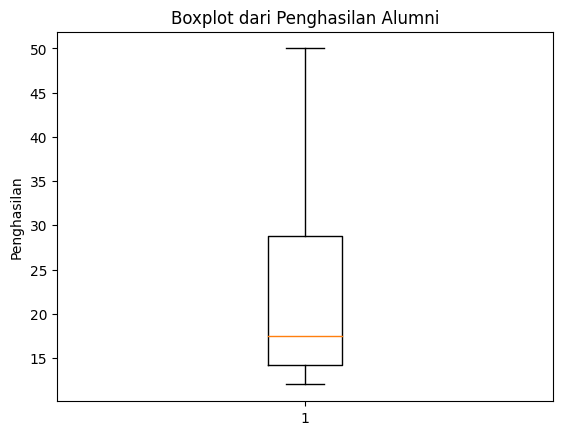

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
# Convert 'penghasilan' column to numeric, handling errors
df['Penghasilan'] = pd.to_numeric(df['Penghasilan'], errors='coerce')

# Drop rows with invalid 'Penghasilan' values (introduced by errors='coerce')
df = df.dropna(subset=['Penghasilan'])

Q1 = df['Penghasilan'].quantile(0.25)
Q3 = df['Penghasilan'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (df["Penghasilan"] >= Q1 - 1.5 * IQR) & (df["Penghasilan"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
df_bukan_outlier = df[bukan_outlier]

# Creating DataFrame With Outliers
df_outlier = df[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
import matplotlib.pyplot as plt # Import the matplotlib library
plt.boxplot(df_outlier['Penghasilan'])
plt.title("Boxplot dari Penghasilan Alumni")
plt.ylabel("Penghasilan")
plt.show()


In [ ]:
df_outlier

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status Saat Ini,Tahun Wirausaha,Bidang Wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Nama program studi setelah Kuliah di FST UIN Jakarta,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,
17,2024-06-26 14:43:08,2008,2013,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,NaN,Compliance APU PPT Senior Associate,12.0,NaN,NaN,NaN,3,3,banyak sekali ilmu dan pengalaman dari bapak d...,Kimia
40,2024-06-26 17:43:43,2008,2012,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,PT. DKSH Indonesia,Manager Technical Lab,25.0,NaN,NaN,NaN,4,4,Kurikulum di kuliah baik teori maupun praktek ...,Kimia
51,2024-06-26 19:03:11,2021,2023,Agustus,Tidak berencana mencari pekerjaan,ASN/PNS,NaN,NaN,Kementerian Pertanian,Koodinator Kelompok Subtansi Kelembagaan Pembi...,15.0,NaN,NaN,NaN,3,4,Penyesuaian kurikulum sejalan dengan perkemban...,MAG
89,2024-06-28 15:36:57,2006,2010,Mei,3-6 Bulan,Karyawan Swasta,NaN,NaN,PT. Aladin Bank Syariah,ETL Developer,18.0,NaN,NaN,NaN,4,3,Lebih banyak praktik lapangan,Matematika
102,2024-06-28 17:16:33,2005,2011,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,Medco Energi,Electrical &Instrument Inspector,32.0,NaN,NaN,NaN,4,4,Pembahasan nilai bahasa dan konsep teknik yang...,Fisika
117,2024-06-28 18:36:29,2014,2018,Mei,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,PT MEGA CAPITAL SEKURITAS,Act Equity Coordinator,12.0,NaN,NaN,NaN,2,2,NaN,Fisika
120,2024-06-28 19:32:48,2009,2013,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,Siemens Energy Indonesia,Automation Engineer,15.0,NaN,NaN,NaN,4,4,Lebih banyak mata kuliah / praktikum yang lebi...,Fisika
166,2024-06-29 13:08:54,2018,2023,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,Puskesmas Tegal Angus Dinas Kesehatan Kabupate...,Operator Keuangan,35.0,NaN,NaN,NaN,5,5,"Dosen-dosen TI baik dalam mengajar, tidak ada ...",Teknik Informatika
176,2024-06-29 13:22:23,2019,2023,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,NaN,DiMuto.io,Automated QA Engineer,14.0,NaN,NaN,NaN,3,4,Kurikulum kurang update dan ketinggalan,Teknik Informatika


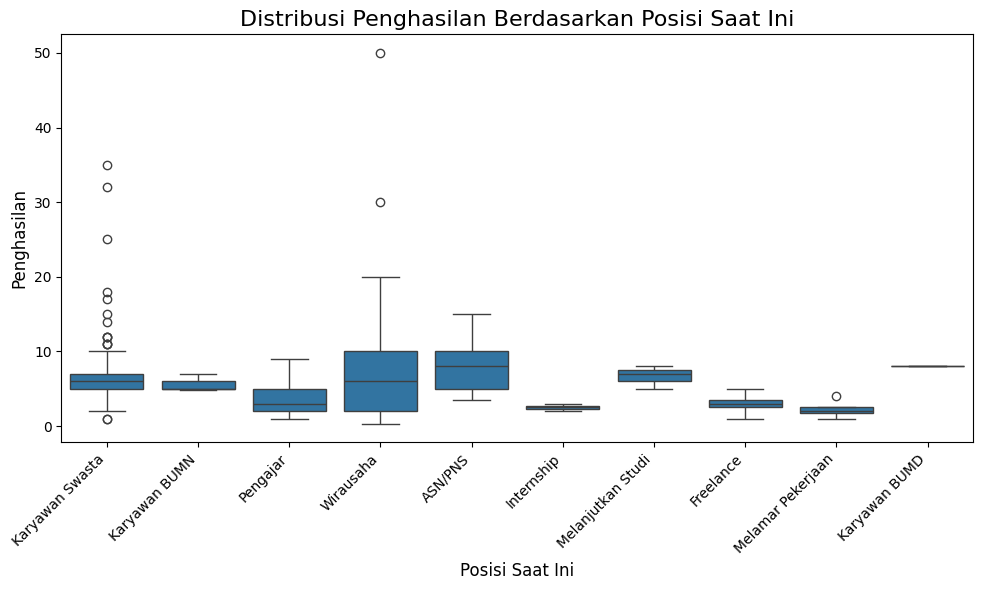

In [ ]:
# Membuat boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Status Saat Ini', y='Penghasilan', data=df)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Penghasilan Berdasarkan Posisi Saat Ini', fontsize=16)
plt.xlabel('Posisi Saat Ini', fontsize=12)
plt.ylabel('Penghasilan', fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Outlier pada dataset tidak dihapus karena, setelah dilakukan analisis lebih lanjut, penghasilan yang tampak sebagai outlier sebenarnya wajar dan sesuai dengan posisi serta status pekerjaan yang dijalankan oleh para alumni. Ini menunjukkan bahwa variasi penghasilan besar tersebut mencerminkan perbedaan peran dan tanggung jawab pekerjaan, sehingga data tersebut tetap relevan untuk analisis.

## **MISSING VALUES**

In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Baris dengan missing values:")
rows_with_missing.shape

Baris dengan missing values:


(202, 18)

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Tahun Masuk UIN Jakarta,0
Tahun Wisuda,0
Bulan Wisuda,0
Waktu Mendapatkan Pekerjaan,0
Status Saat Ini,0
Tahun Wirausaha,180
Bidang Wirausaha,171
Perusahaan,24
Posisi,23


In [ ]:
def ubah_nan(df):
    col = df.columns
    for i in col:
        df[i] = df[i].replace([np.nan, '-', '—', '0'], None)


ubah_nan(df)

Pada dataset, terdapat banyak missing values. Kami melakukan imputasi dengan menggantinya menjadi "none" karena hal ini memungkinkan untuk tetap mempertahankan informasi yang ada tanpa menghapus data penting. Dengan mengganti missing values menjadi "none", kami juga dapat menjaga keselarasan dalam analisis data kategori, terutama ketika kolom yang hilang masih memiliki arti signifikan meskipun tidak terisi.

In [ ]:
df

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status Saat Ini,Tahun Wirausaha,Bidang Wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Nama program studi setelah Kuliah di FST UIN Jakarta,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
Nomor Induk Mahasiswa (NIM),,,,,,,,,,,,,,,,,,
9,2024-06-04 12:04:35,2019,2023,Februari,Kurang dari 3 bulan.,Karyawan Swasta,None,None,Monarch Multi Industries,QC Head,5.0,None,None,None,3,3,None,Kimia
12,2024-06-06 08:37:12,2019,2023,November,3-6 Bulan,Karyawan Swasta,None,None,PT dunia rasa indah (Enesis Group),Rnd analyst AnDev,5.4,None,None,None,4,4,None,Kimia
17,2024-06-26 14:43:08,2008,2013,Februari,Kurang dari 3 bulan.,Karyawan Swasta,None,None,None,Compliance APU PPT Senior Associate,12.0,None,None,None,3,3,banyak sekali ilmu dan pengalaman dari bapak d...,Kimia
18,2024-06-26 14:45:23,2002,2009,Agustus,Kurang dari 3 bulan.,Karyawan Swasta,None,None,UIN Syarif Hidayatullah Jakarta,Laboran Kimia,6.0,None,None,None,4,5,None,Kimia
19,2024-06-26 14:45:32,2002,2007,Mei,6-12 bulan,Karyawan Swasta,None,None,UIN Syarif Hidayatullah,Pengelola Laboratorium,6.0,None,None,None,3,4,Lebih update lagi dengan lingkungan kerja di l...,Kimia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2024-08-23 14:00:15,2017,2024,November,Kurang dari 3 bulan.,Karyawan Swasta,None,None,PT Gemilang Rizqi Efendi Development,Marketing Office,6.0,None,None,None,5,5,Baik dan sesuai dengan yang dibutuhkan,Agribisnis
412,2024-08-24 01:18:52,2017,2024,November,Tidak berencana mencari pekerjaan,Karyawan Swasta,None,None,"Tanatap Artisan ,",Floor Manager,3.0,None,None,None,4,4,None,Agribisnis
420,2024-08-27 12:06:18,2019,2024,November,Kurang dari 3 bulan.,Karyawan Swasta,None,None,Sekolah Tara Salvia,Fasilitator Kegiatan,1.0,None,None,None,3,1,None,Agribisnis


# **EDA**

## **Melihat Jumlah Alumni yang Mengisi Form per Bulan**

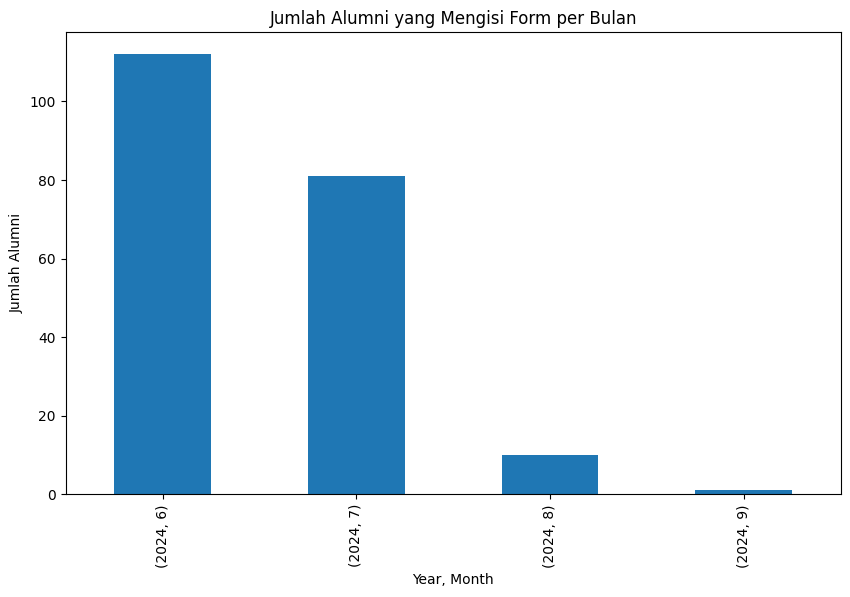

In [ ]:
# Extract year and month directly for analysis without adding them as columns
monthly_counts = df['Timestamp'].groupby([df['Timestamp'].dt.year, df['Timestamp'].dt.month]).size()

# Plot the result
import matplotlib.pyplot as plt

monthly_counts.plot(kind='bar', figsize=(10,6))
plt.title('Jumlah Alumni yang Mengisi Form per Bulan')
plt.xlabel('Year, Month')
plt.ylabel('Jumlah Alumni')
plt.show()

Pada grafik **Jumlah Alumni yang Mengisi Form per Bulan** menunjukkan pada **bulan Juni 2024 menjadi bulan tertinggi** pengisian form Tracer Study Fakultas Sains dan Teknologi (FST) UIN Jakarta, namun **terjadi penurunan** yang signifikan di bulan-bulan berikutnya hingga mencapai titik terendah pada bulan September. Hal ini dikarenakan kurangnya tidak lanjut penyeberan form yang dapat menyebabkan menurunnya jumlah pengisian form oleh alumni.

Kami menyarankan agar FST UIN Jakarta memberikan pengigat secara berkala dan mengirim ulang link form pada grup-grup alumni setiap bulannya. Dengan melakukan ini akan menjangkau lebih banyak alumni dan meningkatkan tingkat pengisian form sepanjang waktu.

## **Hubungan lama kuliah dengan penghasilan bedasarkan waktu mendapatkan pekerjaan**

                             Tahun Masuk UIN Jakarta  Tahun Wisuda  \
Nomor Induk Mahasiswa (NIM)                                          
9                                               2019          2023   
12                                              2019          2023   
17                                              2008          2013   
18                                              2002          2009   
19                                              2002          2007   

                             Penghasilan Waktu Mendapatkan Pekerjaan  \
Nomor Induk Mahasiswa (NIM)                                            
9                                    5.0        Kurang dari 3 bulan.   
12                                   5.4                   3-6 Bulan   
17                                  12.0        Kurang dari 3 bulan.   
18                                   6.0        Kurang dari 3 bulan.   
19                                   6.0                  6-12 bulan   

    

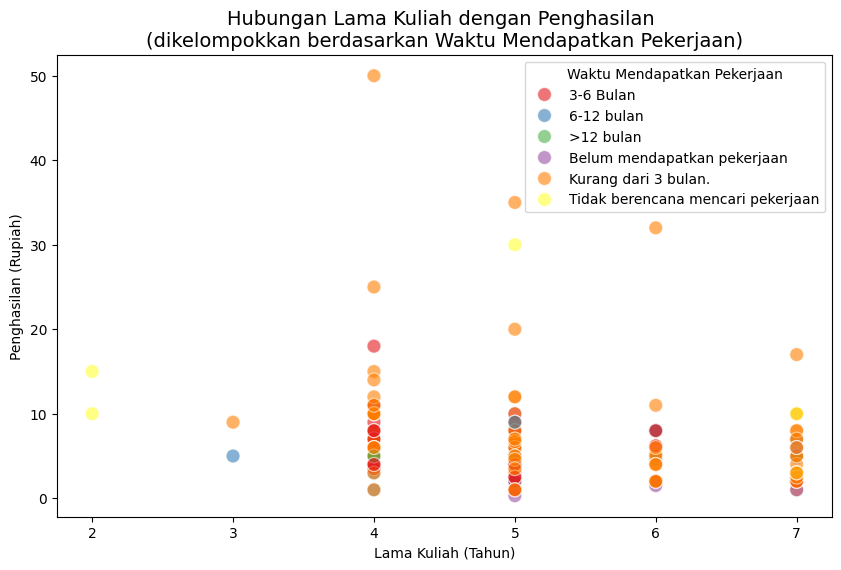

In [ ]:
# Buat tabel baru dengan kolom-kolom yang relevan (tanpa menambahkan ke tabel lama)
df2 = df[['Tahun Masuk UIN Jakarta', 'Tahun Wisuda', 'Penghasilan', 'Waktu Mendapatkan Pekerjaan']].copy()

# Pastikan 'Tahun Masuk UIN Jakarta' dan 'Tahun Wisuda' bertipe numerik (integer)
df2['Tahun Masuk UIN Jakarta'] = pd.to_numeric(df2['Tahun Masuk UIN Jakarta'], errors='coerce')
df2['Tahun Wisuda'] = pd.to_numeric(df2['Tahun Wisuda'], errors='coerce')

# Buat kolom baru 'Lama Kuliah' dengan mengurangkan Tahun Masuk UIN Jakarta dari Tahun Wisuda
df2['Lama Kuliah'] = df2['Tahun Wisuda'] - df2['Tahun Masuk UIN Jakarta']

# Cek hasilnya (misalnya, 5 baris pertama dari tabel baru)
print(df2.head())

# Analisis pengaruh Lama Kuliah terhadap Penghasilan di tabel baru
# Korelasi Pearson
correlation = df2['Lama Kuliah'].corr(df2['Penghasilan'])
print(f"Korelasi antara lama kuliah dan penghasilan: {correlation}")

# Visualisasi menggunakan scatter plot
# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Buat scatter plot dengan kategori 'Waktu Mendapatkan Pekerjaan' sebagai warna
scatter = sns.scatterplot(x='Lama Kuliah',
                          y='Penghasilan',
                          hue='Waktu Mendapatkan Pekerjaan',
                          data=df2,
                          palette='Set1',  # Menggunakan palet warna berbeda
                          alpha=0.6,
                          s=100)  # Ukuran marker

# Menambahkan judul dan label sumbu
plt.title('Hubungan Lama Kuliah dengan Penghasilan \n(dikelompokkan berdasarkan Waktu Mendapatkan Pekerjaan)', fontsize=14)
plt.xlabel('Lama Kuliah (Tahun)')
plt.ylabel('Penghasilan (Rupiah)')

# Menampilkan legenda untuk kategori Waktu Mendapatkan Pekerjaan
plt.legend(title='Waktu Mendapatkan Pekerjaan')

# Menampilkan plot
plt.show()

Pada grafik **Hubungan Lama Kuliah dengan Penghasilan** menunjukkan bahwa beberapa alumni yang lulus dalam waktu **4 tahun memilki penghasilan lebih tinggi**, tetapi secara umum **tidak ada tren yang jelas antara lama kuliah dan tingkat penghasilan**.

Dan jika dilihat bedasarkan **Waktu Mendapatkan Pekerjaan**, alumni yang mendapatkan pekerjaan dalam waktu kurang dari 3 bulan, 3-6 bulan, atau lebih dari 12 bulan cenderung tersebar merata di berbagai tingkat penghasilan dan lama kuliah. Hal ini menunjukkan bahwa **lama waktu yang dibutuhkan untuk mendapatkan pekerjaan** tidak selalu berkorelasi langsung dengan tingkat penghasilan alumni.

Faktor-faktor lain, seperti bidang pekerjaan, keterampilan, atau pengalaman kerja, kemungkinan lebih berpengaruh terhadap penghasilan.

Kami menyarankan agar FST UIN Jakarta dapat menyediakan pelatihan keterampilan tambahan (teknis dan soft skills) agar lulusan FST UIN Jakarta lebih siap bersaing di industri. Kami juga menyarankan FST UIN Jakarta untuk menjalin kerjasama dengan perusahaan dan institusi untuk membuka peluang kerja bagi alumni. Ini akan memberikan pengalaman dan koneksi yang bisa meningkatkan potensi penghasilan alumni.

## **Penghasilan vs Waktu Mendapatkan Pekerjaan Berdasarkan Status Saat Ini**

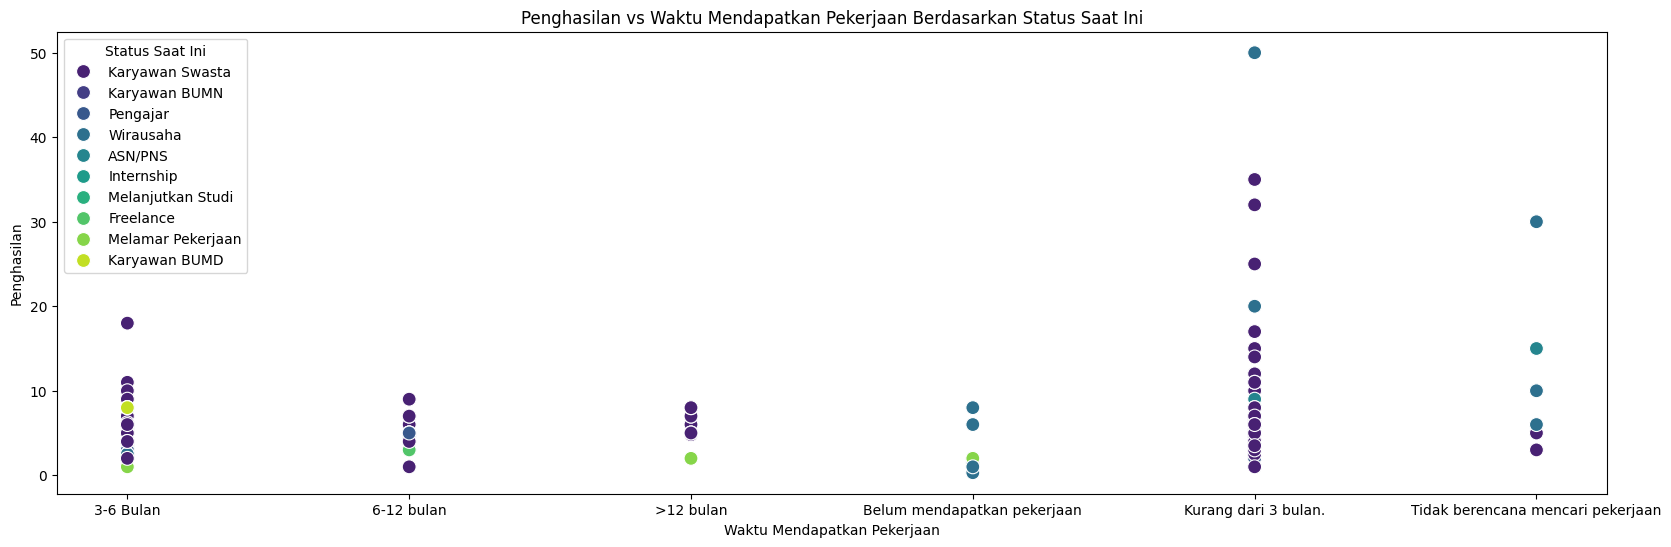

In [ ]:
# Scatter plot Penghasilan vs Waktu Mendapatkan Pekerjaan dengan warna berdasarkan Status Saat Ini
plt.figure(figsize=(20, 6))
sns.scatterplot(
    data=df,
    x="Waktu Mendapatkan Pekerjaan",
    y="Penghasilan",
    hue="Status Saat Ini",
    palette="viridis",
    s=100,
)
plt.title("Penghasilan vs Waktu Mendapatkan Pekerjaan Berdasarkan Status Saat Ini")
plt.xlabel("Waktu Mendapatkan Pekerjaan")
plt.ylabel("Penghasilan")
plt.legend(title="Status Saat Ini")
plt.show()

Pada grafik **Penghasilan vs Waktu Mendapatkan Pekerjaan dengan warna berdasarkan Status Saat Ini** menunukkan:

*   Sebagian besar lulusan FST UIN Jakarta cenderung mendapatkan pekerjaan dalam waktu kurang dari 3 bulan. Hal ini menunjukkan bawah lulusan FST UIN Jakarta cukup cepat untuk terserap dalam dunia industri, meskipun terdapat beberapa alumni yang membutuhkan lebih dari 12 bulan.
*   Alumni yang bekerja sebagai ASN/PNS dan karyawan swasta cenderung memiliki penghasilan yang lebih tinggi dibandingkan dengan status lainnya.
*   Alumni yang bekerja sebagai wirausaha dan karyawan BUMN memiliki penghasilan yang signifikan, hal ini mungkin adanya fleksibilatas dan potensi untuk peningkatan dalam sektor tersebut.
*   Alumni yang bekerja sebagai frelence; intership; dan yang sedang melamar pekerjaan memiliki penghasilan yang cenderung lebih rendah dibandingkan dengan status pekerjaan lainnya.

Kami menyarankan agar FST UIN Jakarta dapat melakukan:

1.   Peningkatan Keterampilan Kerja
2.   Ditingkatkannya Program Magang
3. Dukungan Karir untuk Lulusan yang Belum Mendapatkan Pekerjaan
4. Promosi Peluang Kerja di Sektor Potensial (ASN/PNS dan BUMN)

## **Penghasilan dan Kesesuaian Pekerjaan Berdasarkan Program Studi**

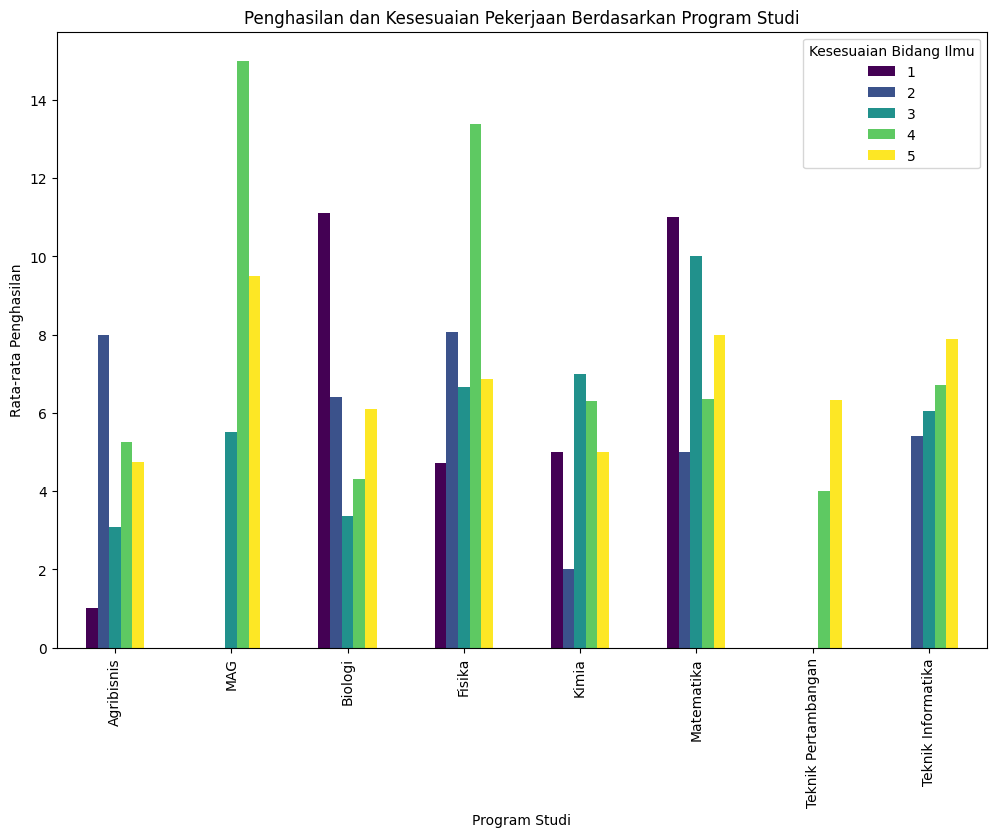

In [ ]:
# Menghitung rata-rata penghasilan berdasarkan Program Studi dan Kesesuaian Bidang Ilmu
penghasilan_kesesuaian = df.groupby(["Program Studi", "Kesesuaian Bidang Ilmu"])["Penghasilan"].mean().unstack()

# Membuat clustered bar chart
penghasilan_kesesuaian.plot(
    kind="bar",
    figsize=(12, 8),
    colormap="viridis"
)
plt.title("Penghasilan dan Kesesuaian Pekerjaan Berdasarkan Program Studi")
plt.xlabel("Program Studi")
plt.ylabel("Rata-rata Penghasilan")
plt.legend(title="Kesesuaian Bidang Ilmu")
plt.show()

Pada grafik **Penghasilan dan Kesesuaian Pekerjaan Berdasarkan Program Studi** menunukkan:

*   Program studi seperti MAG dan Fisika memiliki penghasilan rata-rata yang relatif tinggi, terutama pada tingkat kesesuaian bidang ilmu yang lebih tinggi (skor 4 dan 5). Ini menunjukkan bahwa lulusan yang bekerja di bidang yang sesuai dengan latar belakang akademis mereka cenderung mendapatkan penghasilan yang lebih baik.
*  Program studi Matematika dan Biologi memiliki penghasilan tinggi meskipun bekerja di luar bidang yang sesuai (kesesuaian bidang ilmu dengan skor 1). Ini menandakan bahwa meskipun tidak bekerja di sektor yang berhubungan langsung dengan ilmu yang dipelajari, mereka tetap mampu mendapatkan penghasilan yang relatif tinggi.
*   Program studi Teknik Infomartika dan Teknik Pertambangan, memiliki penghasilan rata-rata yang bervariasi dengan kesesuain bidang ilmu yang tinggi (4 dan 5), yang menunjukkan bahwa penghasilan lulusan mungkin dipengaruhi oleh faktor lain seperti lokasi pekerjaan atau pengalaman kerja.

Kami menyarankan agar FST UIN Jakarta dapat melakukan:

1.   Penekanan pada Penempatan Kerja yang Sesuai dengan Bidang Studi
2.   Program Magang atau Pelatihan yang Dikhususkan untuk Program Studi Tertentu
3. Peningkatan Keterampilan Tambahan untuk Mahasiswa dengan Kesesuaian Rendah

## **Distribusi Status Pekerjaan Berdasarkan Program Studi**

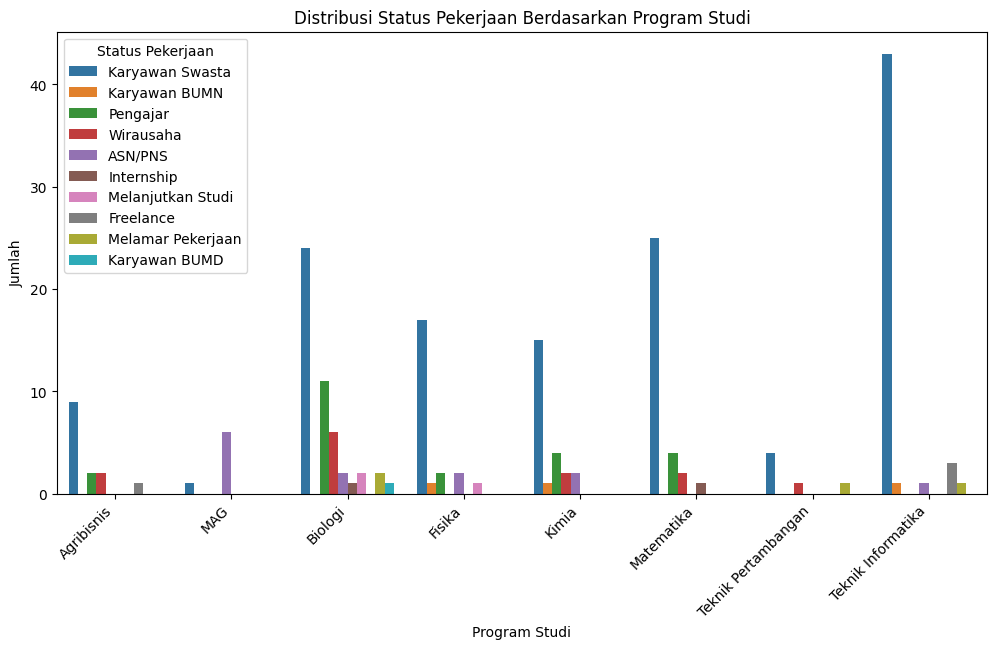

In [ ]:
# Plotting Status Pekerjaan vs Program Studi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Program Studi', hue='Status Saat Ini')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Status Pekerjaan Berdasarkan Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah')
plt.legend(title='Status Pekerjaan')

Visualisasi ini dapat membantu kita untuk melihat persebaran status saat ini berdasarkan program studi. Seperti pada gambar, kebanyakan alumni yang bekerja sebagai karyawan swasta merupakan lulusan program studi Teknik Informatika, Matemmatika, dan Biologi.

Pada data juga dapat dilihat bahwa alumni yang kini bekerja sebagai pengajar kebanyakan merupakan lulusan Biologi.

Sedangkan alumni yang berwirausaha kebanyakan dari mereka merupakan dari lulusan Biologi.

## **Hubungan Program Studi S1 dan S2**

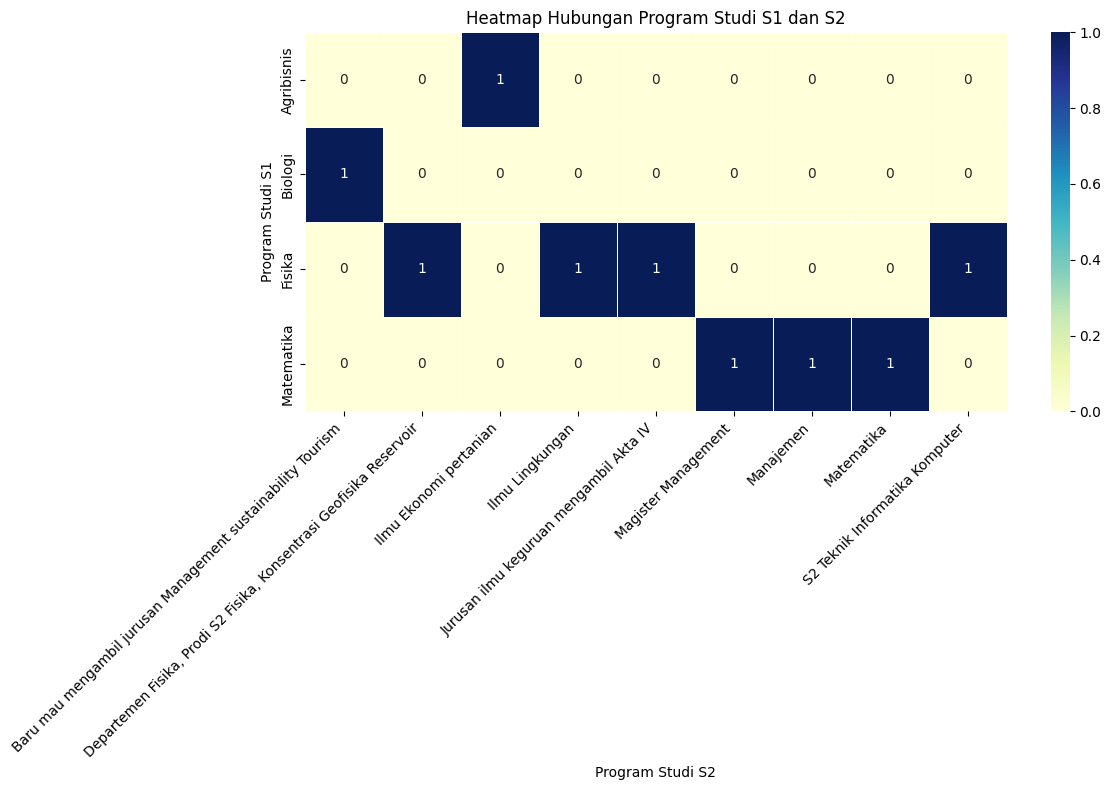

In [ ]:
# Buat tabulasi silang antara Program Studi S1 dan S2
crosstab_result = pd.crosstab(df['Program Studi'], df['Nama program studi setelah Kuliah di FST UIN Jakarta'])

# Buat heatmap dari tabulasi silang
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

plt.title('Heatmap Hubungan Program Studi S1 dan S2')
plt.xlabel('Program Studi S2')
plt.ylabel('Program Studi S1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pada heatmap **Hubungan Program Studi S1 dan S2** menunjukkan:


*  Lulusan Agribisnis cenderung melanjutkan studi ke bidang yang berhubungan langsung seperti Ilmu Ekonomi Pertanian.
*  Lulusan Matemika cenderung melanjutkan studi ke bidang yang sama yaitu Matemtika juga. Terdapat juga yang melajutkan studi bidang Manajemen yang masih berhubungan langsung dengan Matematika.
*   Lulusan Fisika memiliki variasi pilihan program S2 yang lebih luas, termasuk bidang seperti Magister Management, Manajemen, dan S2 Teknik Informatika Komputer. Hal ini menunjukkan bahwa lulusan Fisika dapat memasuki bidang yang lebih beragam untuk jenjang S2, baik dalam sains maupun manajemen.

Kami menyarankan agar FST UIN Jakarta melakukan Pembekalan Keterampilan Pendukung bagi Program S1 yang Berpotensi Melanjutkan ke S2 Lintas Disiplin, seperti manajemen proyek, ilmu komputer dasar, atau analisis data

## **Hubungan Program Studi dengan Kewirausahaan**

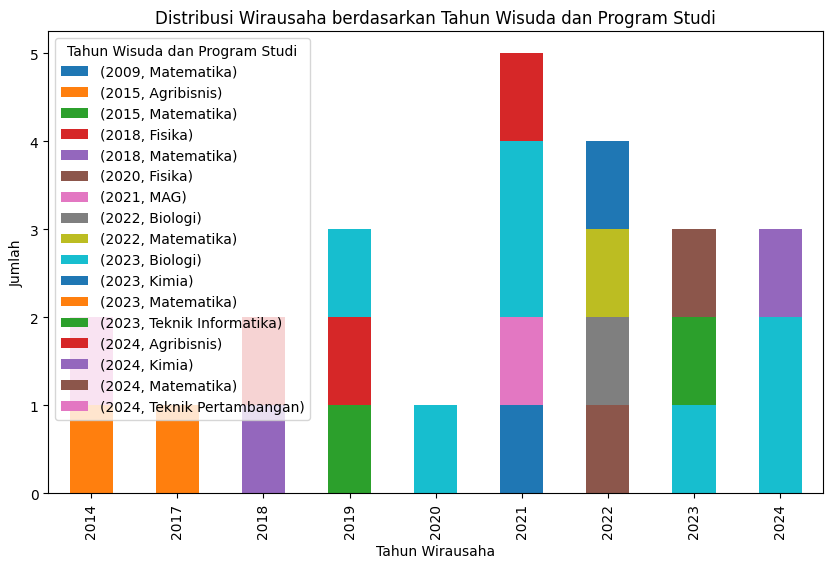

In [ ]:
# Buat tabel silang
crosstab = pd.crosstab(index=df['Tahun Wirausaha'], columns=[df['Tahun Wisuda'], df['Program Studi']])

# Plot stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Wirausaha berdasarkan Tahun Wisuda dan Program Studi')
plt.xlabel('Tahun Wirausaha')
plt.ylabel('Jumlah')
plt.legend(title='Tahun Wisuda dan Program Studi')
plt.show()

• **Jurusan Biologi:** Terdapat 4 orang yang berwirausaha dalam beberapa bulan hingga 2 tahun setelah kelulusan,yaitu 2 orang yang memulai usaha dalam rentang waktu beberapa bulan dan 2 orang yang memulai usaha dalam rentang waktu 2 tahun.

• J**urusan Matematika:** Terdapat 3 orang yang berwirausaha dalam beberapa bulan hingga 2 tahun setelah kelulusan, yaitu 2 orang yang memulai usaha dalam rentang waktu beberapa bulan dan 1 orang dalam rentang waktu 1 tahun.

• **Jurusan MAG:** Terdapat 1 orang yang berwirausaha dalam waktu beberapa bulan setelah kelulusan.

• **Jurusan Kimia:** Terdapat 2 orang yang berwirausaha dalam beberapa bulan hingga 2 tahun setelah kelulusan, yaitu 1 orang dalam rentang waktu beberapa bulan dan 1 orang dalam rentang waktu 1 tahun.

• **Jurusan Teknik Informatika:** Terdapat 1 orang yang berwirausaha dalam rentang waktu beberapa bulan setelah kelulusan.

Kami Menyarankan FST UIN Jakarta:
- Mengundang alumni yang telah berhasil berwirausaha untuk berbagi pengalaman dan memberikan wawasan praktis kepada mahasiswa. Ini dapat membantu mahasiswa memahami tantangan dan peluang dalam memulai usaha.
- Memasukkan mata kuliah yang berfokus pada kewirausahaan di setiap jurusan, untuk mendorong semua mahasiswa memiliki pengetahuan dan keterampilan yang diperlukan untuk berwirausaha.
- Meningkatkan kesadaran tentang potensi berwirausaha melalui seminar di kampus, sehingga lebih banyak mahasiswa termotivasi untuk mempertimbangkan jalur kewirausahaan setelah lulus.

## **Word Cloud Melihat Posisi dan Nama Perusahaan yang Paling Sering Muncul**

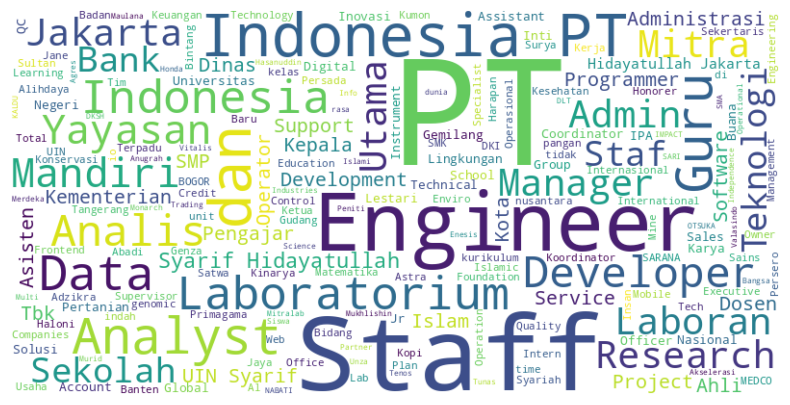

In [ ]:
# Menggabungkan semua nama perusahaan dan posisi alumni menjadi satu string
# Menghilangkan NaN value terlebih dahulu
companies = df['Perusahaan'].dropna().tolist()
positions = df['Posisi'].dropna().tolist()

# Gabungkan list menjadi satu string untuk input word cloud
text_data = ' '.join(companies + positions)

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan axis
plt.show()


Pada analisis word cloud menunjukkan:
1. Posisi "Staff" dan "Engineer" mendominasi dalam posisi pekerjaan alumni. Ini menunjukkan bahwa banyak alumni yang bekerja di level staff atau sebagai engineer di berbagai sektor industri.
2. Posisi Lainnya seperti Laboratorium, Analyst, Guru, dan Manager juga sering muncul, menandakan alumni tersebar di berbagai posisi beragam mulai dari pendidikan, riset, laboratorium, hingga manajemen.
3. "PT", "Yayasan", dan "Indonesia" sangat sering muncul, yang mana banyak alumni bekerja di sektor swasta (di perusahaan berbadan hukum PT), di lembaga pendidikan atau yayasan, dan beberapa di instansi yang beroperasi di sektor nasional.
4. Istilah terkait teknologi seperti "Developer", "Data", dan "Software" menunjukkan alumni juga terlibat dalam pekerjaan yang berhubungan dengan industri teknologi, IT, dan pengembangan software.


Kami Menyarankan FST UIN Jakarta:
1. Meningkatkan Program Pengembangan Karir
2. Berfokus pada studi yang berkaitan dengan Teknologi dan Inovasi
3. Pengembangan Kewirausahaan
4. Peningkatan di Bidang Riset dan Laboratorium
5. Mengandakan Seminar dan Sharing dengan alumni

# **Association Rules (Market Basket Analysis)**

 **Tujuan** dilakukan Association Rules (Market Basket Analysis) untuk melihat apakah alumni dari program studi tertentu cenderung memeliki status pekerjaan tertentu.

*((Misal: apakah alumni dari program studi A lebih cenderung bekerja sebagai Karyawan Swasta dibandingkan program studi lainnya))*

In [ ]:
# Import library untuk Apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Pilih variabel-variabel kategori yang relevan
basket_data = df[['Program Studi', 'Status Saat Ini']]

# Instead of filling NaN with '', replace with 'Unknown' or another string that makes sense in your context.
# This value should be added to the categories of the categorical columns.
for col in basket_data.select_dtypes(include=['category']).columns:
    basket_data[col] = basket_data[col].cat.add_categories(['Unknown']) # add 'Unknown' to categories
    basket_data[col] = basket_data[col].fillna('Unknown') # fill NaN with 'Unknown'

# Gabungkan setiap variabel ke dalam list yang berisi item untuk setiap alumni
basket_list = basket_data.apply(lambda row: [str(item) for item in row if item != ''], axis=1).tolist()

# Gunakan TransactionEncoder untuk mengonversi data ke format One-Hot Encoding yang dibutuhkan oleh Apriori
te = TransactionEncoder()
basket_onehot = te.fit_transform(basket_list)
basket_df = pd.DataFrame(basket_onehot, columns=te.columns_)

basket_df

,ASN/PNS,Agribisnis,Biologi,Fisika,Freelance,Internship,Karyawan BUMD,Karyawan BUMN,Karyawan Swasta,Kimia,MAG,Matematika,Melamar Pekerjaan,Melanjutkan Studi,Pengajar,Teknik Informatika,Teknik Pertambangan,Wirausaha
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
200,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
201,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
202,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Menemukan Frequent Itemsets dengan minimum support 0.1 (10%)
frequent_itemsets = apriori(basket_df, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

# Lihat Frequent Itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.676471,(Karyawan Swasta)
0,0.240196,(Biologi)
6,0.240196,(Teknik Informatika)
9,0.210784,"(Teknik Informatika, Karyawan Swasta)"
4,0.156863,(Matematika)
8,0.122549,"(Karyawan Swasta, Matematika)"
3,0.117647,(Kimia)
7,0.117647,"(Biologi, Karyawan Swasta)"
1,0.112745,(Fisika)
5,0.112745,(Pengajar)


Frequent itemsets menunjukkan kombinasi item (dalam hal ini, kategori 'Program Studi' dan 'Status Saat Ini') yang muncul bersama secara sering. Kolom support menunjukkan proporsi atau persentase transaksi (alumni) yang mengandung kombinasi item tersebut.

*Contoh: Itemset (Karyawan Swasta, Teknik Informatika) memiliki support sebesar 0.2107 (21%), menunjukkan bahwa 21% alumni adalah karyawan swasta dengan latar belakang Teknik Informatika.*

In [ ]:
# Membuat Association Rules dengan minimum confidence 0.5 (50%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)

# Lihat beberapa aturan asosiasi
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Teknik Informatika),(Karyawan Swasta),0.240196,0.676471,0.210784,0.877551,1.297249,0.048299,2.642157,0.301575
1,(Matematika),(Karyawan Swasta),0.156863,0.676471,0.122549,0.781250,1.154891,0.016436,1.478992,0.159070


**Interpretasi Rules:**

1. **Rules pertama**:
   - **Antecedent**: Alumni dengan Program Studi Teknik Informatika.
   - **Consequent**: Alumni bekerja sebagai karyawan swasta.
   - **Support**: 0.21 (21% alumni memiliki kesesuaian bidang studi Teknik Informatika dan bekerja sebagai karyawan swasta).
   - **Confidence**: 0.877 (87,7% alumni dengan kategori kesesuaian bidang studi Teknik Informatika bekerja sebagai karyawan swasta).
   - **Lift**: 1.29, artinya alumni dengan kesesuaian bidang studi Teknik Informatika lebih mungkin bekerja sebagai karyawan swasta dibandingkan secara acak.

2. **Rules kedua**:
   - **Antecedent**: Alumni dengan Program Studi Matematika.
   - **Consequent**: Alumni bekerja sebagai karyawan swasta.
   - **Support**: 0.122 (12,2% alumni memiliki kesesuaian bidang studi Matematika dan bekerja sebagai karyawan swasta).
   - **Confidence**: 0.781 (78,1% alumni dengan kategori kesesuaian bidang studi Matematika bekerja sebagai karyawan swasta).
   - **Lift**: 1.15, menunjukkan bahwa alumni dengan kesesuaian bidang studi Matematika juga lebih mungkin bekerja sebagai karyawan swasta dibandingkan dengan ekspektasi acak.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


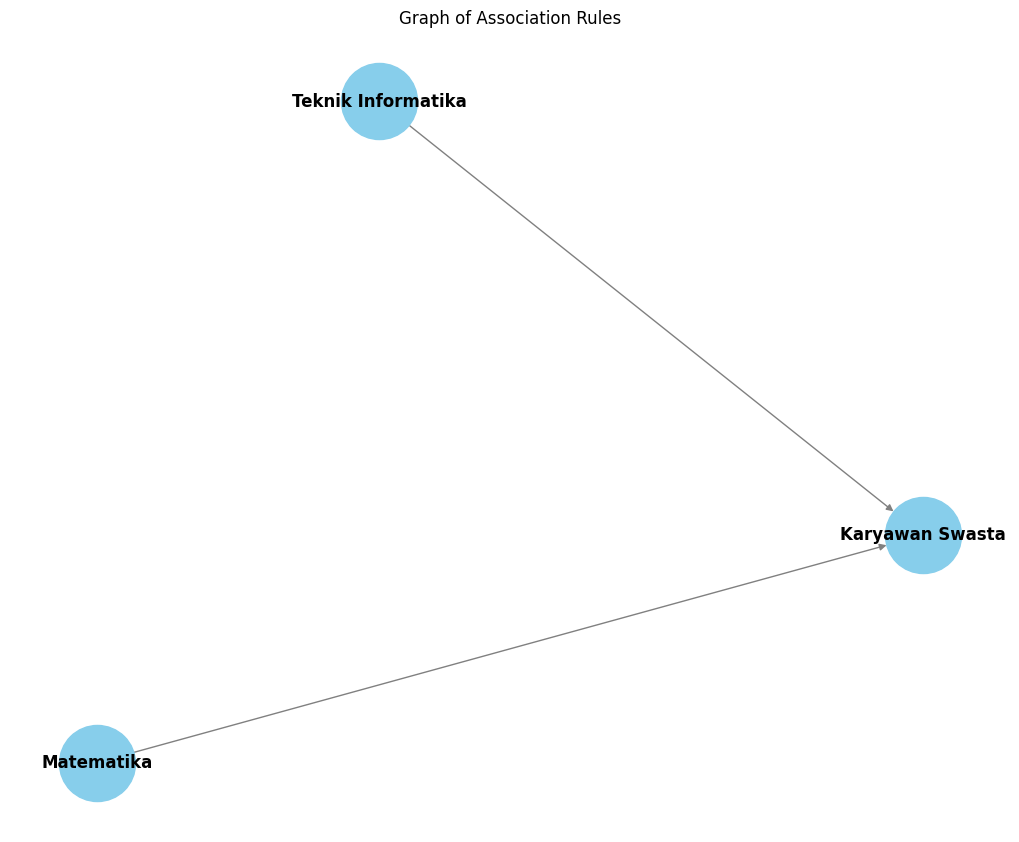

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graph dari aturan asosiasi
G = nx.DiGraph()

for i, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Visualisasi
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")
plt.title("Graph of Association Rules")
plt.show()

**Insight yang dapat diambil dari melakukan Assocition Rules:**

1. Alumni dari **Teknik Informatika** memiliki peluang lebih tinggi untuk berkeja sebagai **Karyawan Swasta** dibandingkan alumni dari program studi lainnya. Hal ini dilihat dari **confidence** yang tinggi (87,8%) dan nilai **lift** yang lebih besar dari 1 (1.30).

2. Alumni dari **Matematika** memiliki hubungan yang kuat dengan pekerjaan **Karyawan Swasta**, meskipun tidak sekuat Teknik Informatika. **Confidence** sebesar 78,1% dan **lift** 1.16 masih menunjukkan bahwa alumni Matematika memiliki peluang lebih tinggi untuk bekerja di sektor swasta.

3. Program studi seperti **Biologi, Fisika, dan Kimia** tidak menunjukkan hubungan yang kuat dengan pekerjaan di sektor swasta.

Kami menyarankan agar FST UIN Jakarta meningkatkan peluang karir bagi lulusan di program studi lain seperti Biologi, Fisika, dan Kimia. Dengan langkah-langkah strategis seperti peningkatan kerjasama industri, peninjauan kurikulum, dan monitoring karir alumni, UIN Jakarta dapat lebih mempersiapkan lulusannya untuk bersaing di berbagai sektor kerja.

# **Clustering**

## **Clustering dengan K-Prototype**

In [ ]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Penghasilan']

#Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

       Penghasilan
count        204.0
mean           6.5
std            5.6
min            0.3
25%            4.0
50%            5.0
75%            7.0
max           50.0

Hasil Standarisasi

                             Penghasilan
Nomor Induk Mahasiswa (NIM)             
9                              -0.272780
12                             -0.200885
17                              0.985393
18                             -0.093041
19                             -0.093041

Statistik Hasil Standarisasi

       Penghasilan
count        204.0
mean           0.0
std            1.0
min           -1.0
25%           -0.0
50%           -0.0
75%            0.0
max            8.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Membuat salinan data frame,"
df['Jarak Tahun'] = df['Tahun Wisuda'].astype(int) - df['Tahun Masuk UIN Jakarta'].astype(int)
kolom_kategorik = [ 'Program Studi','Jarak Tahun',"Waktu Mendapatkan Pekerjaan","Tahun Wirausaha"]
df_encode = df[kolom_kategorik].copy()

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

                             Program Studi  Jarak Tahun  \
Nomor Induk Mahasiswa (NIM)                               
9                                        3            2   
12                                       3            2   
17                                       3            3   
18                                       3            5   
19                                       3            3   

                             Waktu Mendapatkan Pekerjaan  Tahun Wirausaha  
Nomor Induk Mahasiswa (NIM)                                                
9                                                      4                9  
12                                                     0                9  
17                                                     4                9  
18                                                     4                9  
19                                                     1                9  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_final = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_final.head())

                             Program Studi  Jarak Tahun  \
Nomor Induk Mahasiswa (NIM)                               
9                                        3            2   
12                                       3            2   
17                                       3            3   
18                                       3            5   
19                                       3            3   

                             Waktu Mendapatkan Pekerjaan  Tahun Wirausaha  \
Nomor Induk Mahasiswa (NIM)                                                 
9                                                      4                9   
12                                                     0                9   
17                                                     4                9   
18                                                     4                9   
19                                                     1                9   

                             Penghasilan  
Nom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 9 to 432
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Program Studi                204 non-null    int64  
 1   Jarak Tahun                  204 non-null    int64  
 2   Waktu Mendapatkan Pekerjaan  204 non-null    int64  
 3   Tahun Wirausaha              204 non-null    int64  
 4   Penghasilan                  204 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 9.6 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


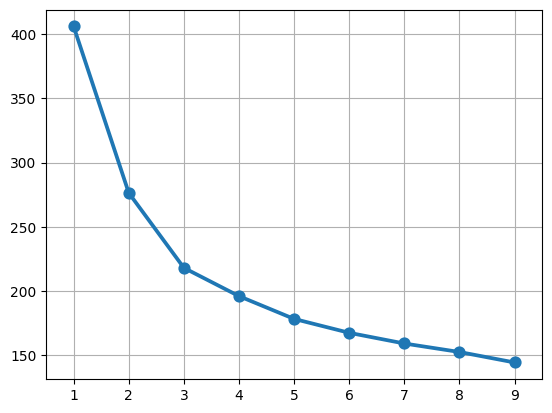

In [ ]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  # Inisialisasi KPrototypes dengan import yang benar
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(df_final, categorical = [0,1, 2, 3])
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [ ]:
Kproto = KPrototypes(n_clusters = 3, random_state = 60)
kproto = Kproto.fit(df_final, categorical = [0,1, 2, 3])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb')) # Now pickle is defined and can be used

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

clusters = kproto.predict(df_final, categorical = [0,1, 2, 3])
print('Alumni: {}\n'.format(clusters))

# Menggabungkan data
df_final_cluster = df[['Penghasilan', 'Program Studi','Jarak Tahun',"Waktu Mendapatkan Pekerjaan","Tahun Wirausaha"]].copy()
df_final_cluster['cluster'] = clusters

Alumni: [0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 2 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 0 1 1 2 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_final_cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Penghasilan,Program Studi,Jarak Tahun,Waktu Mendapatkan Pekerjaan,Tahun Wirausaha,cluster
Nomor Induk Mahasiswa (NIM),,,,,,
9,5.0,Kimia,4,Kurang dari 3 bulan.,None,0
12,5.4,Kimia,4,3-6 Bulan,None,0
17,12.0,Kimia,5,Kurang dari 3 bulan.,None,0
18,6.0,Kimia,7,Kurang dari 3 bulan.,None,0
19,6.0,Kimia,5,6-12 bulan,None,1
...,...,...,...,...,...,...
410,6.0,Agribisnis,7,Kurang dari 3 bulan.,None,0
412,3.0,Agribisnis,7,Tidak berencana mencari pekerjaan,None,1
420,1.0,Agribisnis,5,Kurang dari 3 bulan.,None,1


## **Analisis Cluster**

In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 0)].describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Penghasilan,Program Studi,Jarak Tahun,Waktu Mendapatkan Pekerjaan,Tahun Wirausaha,cluster
count,100.000000,100,100.000000,100,12,100.0
unique,NaN,8,NaN,6,6,NaN
top,NaN,Teknik Informatika,NaN,Kurang dari 3 bulan.,2022,NaN
freq,NaN,38,NaN,60,3,NaN
mean,7.553000,NaN,4.690000,NaN,NaN,0.0
std,2.864004,NaN,1.160764,NaN,NaN,0.0
min,3.000000,NaN,2.000000,NaN,NaN,0.0
25%,5.275000,NaN,4.000000,NaN,NaN,0.0
50%,7.000000,NaN,4.000000,NaN,NaN,0.0
75%,9.000000,NaN,5.000000,NaN,NaN,0.0


In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 1)].describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Penghasilan,Program Studi,Jarak Tahun,Waktu Mendapatkan Pekerjaan,Tahun Wirausaha,cluster
count,98.000000,98,98.000000,98,9,98.0
unique,NaN,8,NaN,6,6,NaN
top,NaN,Biologi,NaN,Kurang dari 3 bulan.,2024,NaN
freq,NaN,40,NaN,47,3,NaN
mean,3.901020,NaN,5.459184,NaN,NaN,1.0
std,1.753553,NaN,0.986176,NaN,NaN,0.0
min,0.300000,NaN,3.000000,NaN,NaN,1.0
25%,2.500000,NaN,5.000000,NaN,NaN,1.0
50%,4.000000,NaN,5.000000,NaN,NaN,1.0
75%,5.000000,NaN,6.000000,NaN,NaN,1.0


In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 2)].describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Penghasilan,Program Studi,Jarak Tahun,Waktu Mendapatkan Pekerjaan,Tahun Wirausaha,cluster
count,6.00000,6,6.000000,6,3,6.0
unique,NaN,5,NaN,2,3,NaN
top,NaN,Biologi,NaN,Kurang dari 3 bulan.,2022,NaN
freq,NaN,2,NaN,5,1,NaN
mean,32.00000,NaN,4.833333,NaN,NaN,2.0
std,10.29563,NaN,0.752773,NaN,NaN,0.0
min,20.00000,NaN,4.000000,NaN,NaN,2.0
25%,26.25000,NaN,4.250000,NaN,NaN,2.0
50%,31.00000,NaN,5.000000,NaN,NaN,2.0
75%,34.25000,NaN,5.000000,NaN,NaN,2.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


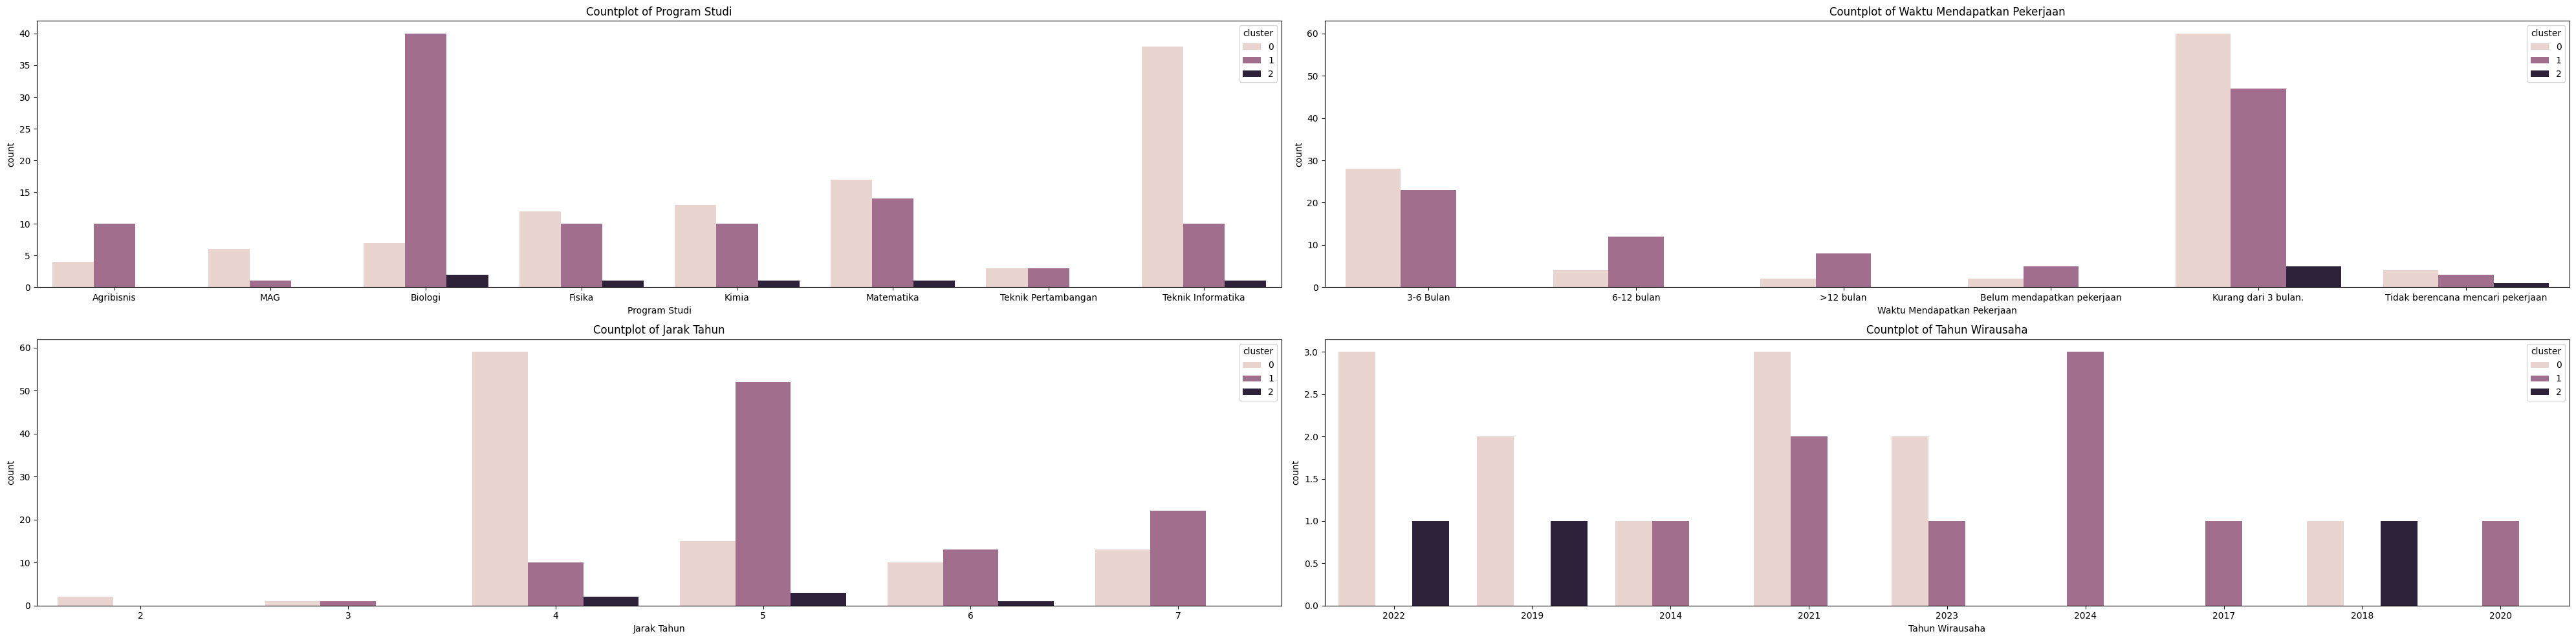

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(40, 10))
ax = ax.flatten()

columns = ['Program Studi', "Waktu Mendapatkan Pekerjaan", "Jarak Tahun", "Tahun Wirausaha"]

for i, column in enumerate(columns):
    sns.countplot(data=df_final_cluster, x=column, ax=ax[i], hue='cluster')
    ax[i].set_title(f'Countplot of {column}')

for j in range(len(columns), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


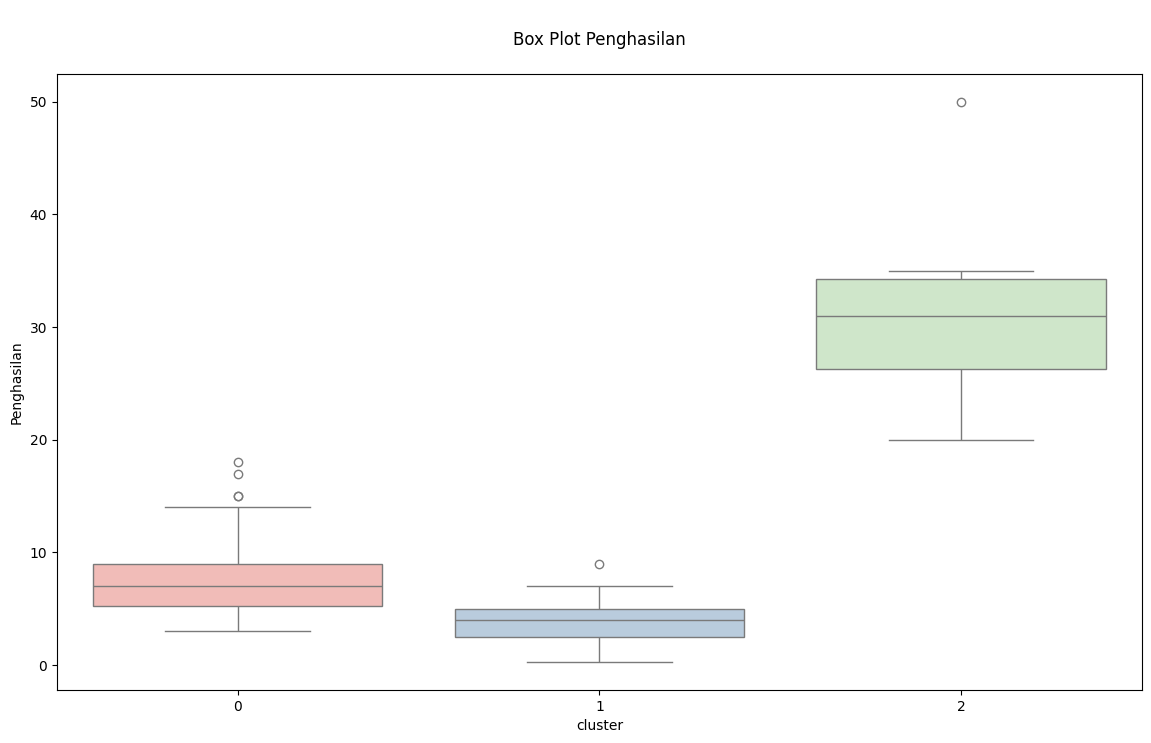

In [ ]:
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final_cluster, palette="Pastel1")
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


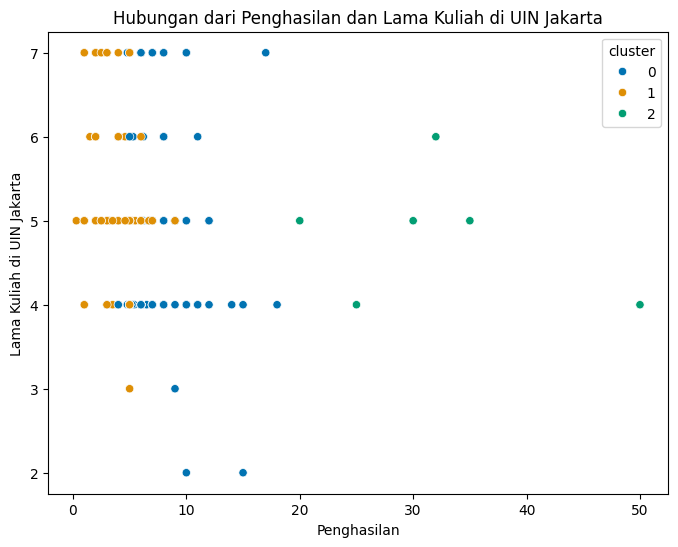

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Penghasilan', y='Jarak Tahun', hue='cluster', data=df_final_cluster, palette = 'colorblind')

plt.title('Hubungan dari Penghasilan dan Lama Kuliah di UIN Jakarta')
plt.xlabel('Penghasilan')
plt.ylabel('Lama Kuliah di UIN Jakarta')

plt.show()

**Cluster 0:**
   - **Karakteristik:** Pelanggan dalam cluster ini memiliki **Penghasilan Cukup Tinggi** dengan **lama kuliah(2 hingga 7 tahun)**.  Di dominasi Alumni dari jurusan **Teknik Informatika** lalu disusul dengan **Matematika** dan banyak alumni yang **Berwirausaha**.
   - **Waktu Mendapatkan Pekerjaan** beragam dari yang paling banyak **kurang dari 3 bulan**, lalu disusul  **3-6 Bulan**, dan **Tidak Berencana Mencari Pekerjaan**.
   - **Insight:** Cluster ini menunjukkan bahwa Alumni Jurusan Matematika dan Teknik Informatika cenderung memiliki penghasilan yang cukup tinggi, mencerminkan permintaan tinggi di sektor teknologi dan informasi. Sebagian besar alumni mendapatkan pekerjaan dalam waktu singkat, menunjukkan bahwa mereka memiliki akses yang baik ke peluang kerja yang sesuai dengan kualifikasi mereka. Adanya alumni yang **Belum Mendapatkan Pekerjaan**, dan**Tidak Berencana Mencari Pekerjaan**, ini mungkin mengindikasikan adanya ketidakpuasan atau alternatif yang diambil, seperti kewirausahawan.
   
   Kami Menyarankan FST UIN Jakarta menyediakan pelatihan tambahan untuk keterampilan praktis yang dibutuhkan di sektor teknologi, seperti pemrograman dan analisis data, Ini dapat membantu lulusan lebih siap menghadapi tantangan di dunia kerja.

**Cluster 1:**
  - **Karakteristik:** Alumni dalam cluster ini memiliki **Penghasilan kecil** dengan **lama kuliah(3 hingga 7 tahun)**. Di dominasi Alumni dari jurusan **Biologi** lalu disusul dengan **Matematika** dan cukup banyak yang **Berwirausaha**.
  - **Waktu Mendapatkan Pekerjaan** beragam dari yang paling banyak **kurang dari 3 bulan**, lalu disusul **3-6 bulan**, **6-12 bulan**, dan  **>12 bulan**.
  - **Insight:** Cluster ini menunjukkan bahwa Alumni Jurusan Biologi dan Matematika cenderung memiliki penghasilan yang rendah, ini mungkin disebabkan oleh banyaknya persaingan dalam mendapatkan pekerjaan. Alumni yang  memerlukan waktu **6-12 bulan bahkan lebih** menunjukkan adanya tantangan dalam proses pencarian kerja.
Kami Menyarankan FST UIN Jakarta membuka peluang untuk menyediakan
   program pelatihan untuk meningkatkan keterampilan teknis dan soft skills, serta mengadakan workshop dan seminar tentang pengembangan keterampilan, kewirausahaan, dan persiapan memasuki dunia kerja.

**Cluster 2:**
  - **Karakteristik:** Pelanggan dalam cluster ini memiliki **Penghasilan Tinggi** dengan **lama kuliah(3-6 tahun)**.  Di dominasi Alumni dari jurusan **Biologi** lalu disusul dengan **Teknik Informatika** dan terdapat alumni yang **Berwirausaha**.
  - **Waktu Mendapatkan Pekerjaan** dari yang paling banyak **Kurang dari 3 Bulan**, lalu disusul **Tidak Berencana Mencari Pekerjaan**.
  - **Insight:** Cluster ini menunjukkan bahwa Alumni Jurusan Teknik Informatika dan Biologi cenderung memiliki penghasilan yang tinggi, mencerminkan permintaan tinggi di sektor teknologi dan informasi, Meskipun  ada beberapa yang tidak berencana mencari pekerjaan, Hal ini dapat mencakup alumni yang memilih untuk Berwirausaha.  Kami menyarankan FST UIN Jakarta mengadakan sesi bimbingan karir serta mengembangkan program pelatihan kewirausahaan.

# **Kesimpulan dan Rekomendasi Utama**

1. **Meningkatkan Keterlibatan Alumni:** Perlu strategi komunikasi dan tindak lanjut yang lebih proaktif untuk memastikan partisipasi alumni dalam pengisian tracer study secara berkala.

2. **Relevansi Pendidikan dengan Dunia Kerja:** Penyesuaian kurikulum dan penguatan pelatihan keterampilan tambahan sesuai dengan kebutuhan industri, khususnya untuk program studi yang prospeknya masih bisa ditingkatkan.

3. **Pengembangan Kewirausahaan**: Fasilitasi pelatihan kewirausahaan, terutama bagi program studi yang menunjukkan minat tinggi dalam berwirausaha.

4. **Peningkatan Kolaborasi dengan Industri:** Menjalin kerjasama lebih luas dengan industri untuk meningkatkan akses lulusan terhadap peluang kerja relevan.